# Import dataset

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"annimuss","key":"fd737110693a9113749ff68f2f049db5"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d nirmalsankalana/crop-pest-and-disease-detection

Dataset URL: https://www.kaggle.com/datasets/nirmalsankalana/crop-pest-and-disease-detection
License(s): CC0-1.0
 99% 1.24G/1.25G [00:08<00:00, 106MB/s] 
100% 1.25G/1.25G [00:08<00:00, 156MB/s]


In [ ]:
!mkdir crop-pest-and-disease-detection
!unzip crop-pest-and-disease-detection.zip -d crop-pest-and-disease-detection
!ls crop-pest-and-disease-detection

Streaming output truncated to the last 5000 lines.
  inflating: crop-pest-and-disease-detection/Tomato leaf blight/leaf blight130_.jpg  
  inflating: crop-pest-and-disease-detection/Tomato leaf blight/leaf blight1310_.jpg  
  inflating: crop-pest-and-disease-detection/Tomato leaf blight/leaf blight1311_.jpg  
  inflating: crop-pest-and-disease-detection/Tomato leaf blight/leaf blight1312_.jpg  
  inflating: crop-pest-and-disease-detection/Tomato leaf blight/leaf blight1313_.jpg  
  inflating: crop-pest-and-disease-detection/Tomato leaf blight/leaf blight1314_.jpg  
  inflating: crop-pest-and-disease-detection/Tomato leaf blight/leaf blight1315_.jpg  
  inflating: crop-pest-and-disease-detection/Tomato leaf blight/leaf blight1316_.jpg  
  inflating: crop-pest-and-disease-detection/Tomato leaf blight/leaf blight131_.jpg  
  inflating: crop-pest-and-disease-detection/Tomato leaf blight/leaf blight132_.jpg  
  inflating: crop-pest-and-disease-detection/Tomato leaf blight/leaf blight133_.jp

In [ ]:
import shutil

# Daftar folder yang ingin dihapus
folders_to_delete = ["/content/crop-pest-and-disease-detection/Cashew anthracnose", "/content/crop-pest-and-disease-detection/Cashew gumosis", "/content/crop-pest-and-disease-detection/Cashew healthy", "/content/crop-pest-and-disease-detection/Cashew leaf miner", "/content/crop-pest-and-disease-detection/Cashew red rust", "/content/crop-pest-and-disease-detection/Maize fall armyworm", "/content/crop-pest-and-disease-detection/Maize grasshoper", "/content/crop-pest-and-disease-detection/Maize healthy", "/content/crop-pest-and-disease-detection/Maize leaf beetle", "/content/crop-pest-and-disease-detection/Maize leaf blight", "/content/crop-pest-and-disease-detection/Maize leaf spot", "/content/crop-pest-and-disease-detection/Maize streak virus", "/content/crop-pest-and-disease-detection/Tomato healthy", "/content/crop-pest-and-disease-detection/Tomato leaf blight", "/content/crop-pest-and-disease-detection/Tomato leaf curl", "/content/crop-pest-and-disease-detection/Tomato septoria leaf spot", "/content/crop-pest-and-disease-detection/Tomato verticulium wilt"]
# Loop untuk menghapus folder satu per satu
for folder in folders_to_delete:
    try:
        shutil.rmtree(folder)  # Menghapus folder beserta isinya
        print(f"Folder {folder} berhasil dihapus.")
    except FileNotFoundError:
        print(f"Folder {folder} tidak ditemukan.")
    except Exception as e:
        print(f"Terjadi kesalahan saat menghapus {folder}: {e}")


Folder /content/crop-pest-and-disease-detection/Cashew anthracnose berhasil dihapus.
Folder /content/crop-pest-and-disease-detection/Cashew gumosis berhasil dihapus.
Folder /content/crop-pest-and-disease-detection/Cashew healthy berhasil dihapus.
Folder /content/crop-pest-and-disease-detection/Cashew leaf miner berhasil dihapus.
Folder /content/crop-pest-and-disease-detection/Cashew red rust berhasil dihapus.
Folder /content/crop-pest-and-disease-detection/Maize fall armyworm berhasil dihapus.
Folder /content/crop-pest-and-disease-detection/Maize grasshoper berhasil dihapus.
Folder /content/crop-pest-and-disease-detection/Maize healthy berhasil dihapus.
Folder /content/crop-pest-and-disease-detection/Maize leaf beetle berhasil dihapus.
Folder /content/crop-pest-and-disease-detection/Maize leaf blight berhasil dihapus.
Folder /content/crop-pest-and-disease-detection/Maize leaf spot berhasil dihapus.
Folder /content/crop-pest-and-disease-detection/Maize streak virus berhasil dihapus.
Fol

# Import library

In [ ]:
import os
import itertools

import numpy as np
import pandas as pd
import math
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.applications import VGG16
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

# ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Visualisasi data

In [ ]:
def count_images(folder_path):
    total_images = 0
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Sesuaikan dengan ekstensi gambar Anda
                total_images += 1
    return total_images

# Path folder dataset Anda
dataset_folder = '/content/crop-pest-and-disease-detection'

# Hitung jumlah gambar
total_images = count_images(dataset_folder)

# Tampilkan jumlah gambar
print(f"Total gambar dalam dataset: {total_images}")

Total gambar dalam dataset: 7508


In [ ]:
def loading_the_data(data_dir):
    filepaths = []
    labels = []

    folds = os.listdir(data_dir)

    for fold in folds:
        foldpath = os.path.join(data_dir, fold)
        filelist = os.listdir(foldpath)
        for file in filelist:
            fpath = os.path.join(foldpath, file)

            filepaths.append(fpath)
            labels.append(fold)

    Fseries = pd.Series(filepaths, name='filepaths')
    Lseries = pd.Series(labels, name='labels')

    df = pd.concat([Fseries, Lseries], axis=1)

    return df

In [ ]:
data_dir = '/content/crop-pest-and-disease-detection'
df = loading_the_data(data_dir)

df

filepaths  \
0     /content/crop-pest-and-disease-detection/Cassa...   
1     /content/crop-pest-and-disease-detection/Cassa...   
2     /content/crop-pest-and-disease-detection/Cassa...   
3     /content/crop-pest-and-disease-detection/Cassa...   
4     /content/crop-pest-and-disease-detection/Cassa...   
...                                                 ...   
7503  /content/crop-pest-and-disease-detection/Cassa...   
7504  /content/crop-pest-and-disease-detection/Cassa...   
7505  /content/crop-pest-and-disease-detection/Cassa...   
7506  /content/crop-pest-and-disease-detection/Cassa...   
7507  /content/crop-pest-and-disease-detection/Cassa...   

                        labels  
0     Cassava bacterial blight  
1     Cassava bacterial blight  
2     Cassava bacterial blight  
3     Cassava bacterial blight  
4     Cassava bacterial blight  
...                        ...  
7503        Cassava green mite  
7504        Cassava green mite  
7505        Cassava green mite  
7506        Cassava green mite  
7507        Cassava green mite  

[7508 rows x 2 columns]

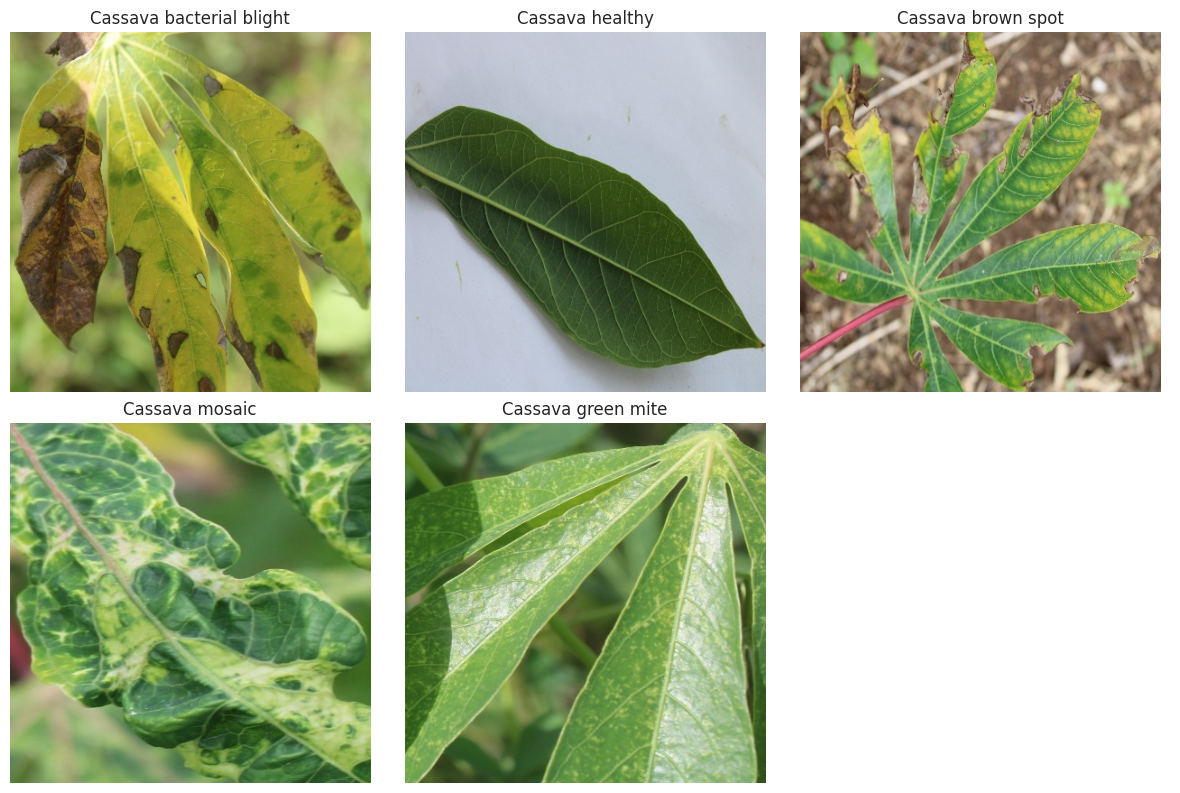

In [ ]:
dataset_dir = '/content/crop-pest-and-disease-detection'


class_names = os.listdir(dataset_dir)


num_classes = len(class_names)
cols = 3
rows = math.ceil(num_classes / cols)


fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
axes = axes.flatten()


total_images = 0
for i, class_name in enumerate(class_names):
    if total_images >= num_classes:
        break

    class_dir = os.path.join(dataset_dir, class_name)
    image_files = [f for f in os.listdir(class_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

    if image_files:
        image_path = os.path.join(class_dir, image_files[0])
        img = plt.imread(image_path)

        axes[i].imshow(img)
        axes[i].set_title(class_name)
        axes[i].axis('off')
        total_images += 1
    else:
        axes[i].axis('off')


for j in range(total_images, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
data_balance = df.labels.value_counts()
data_balance

labels
Cassava bacterial blight    2614
Cassava brown spot          1481
Cassava mosaic              1205
Cassava healthy             1193
Cassava green mite          1015
Name: count, dtype: int64

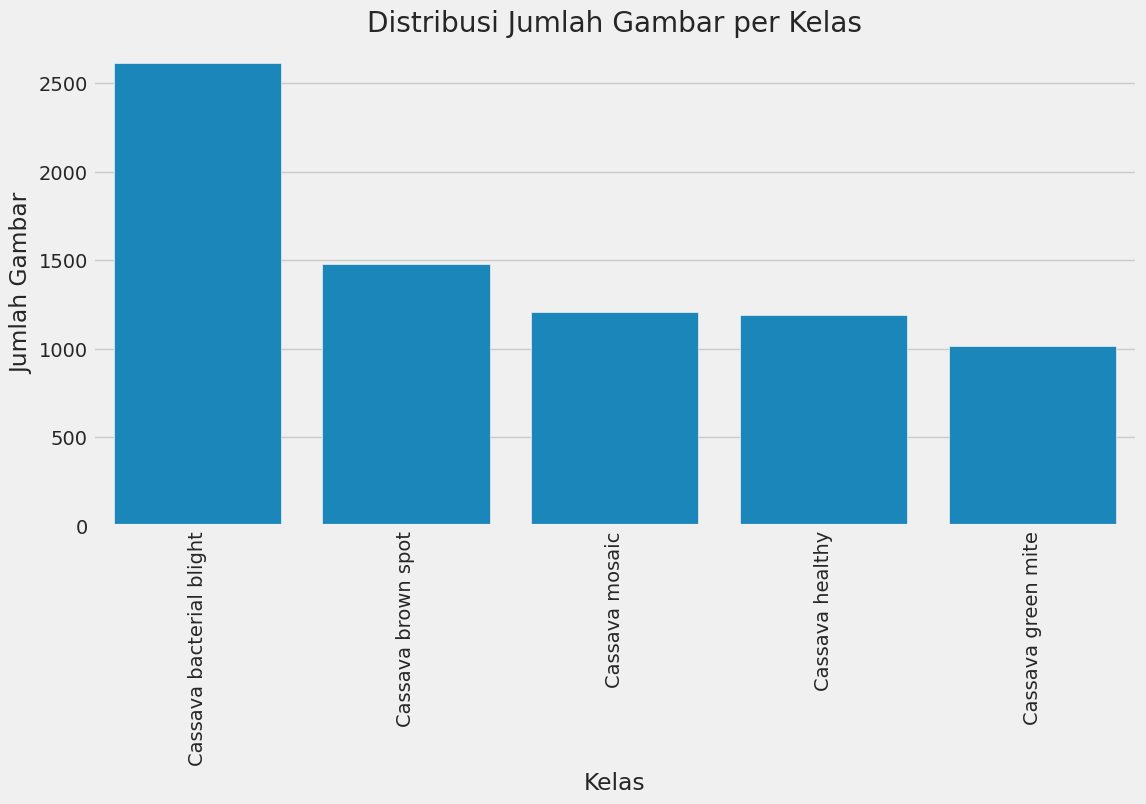

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=data_balance.index, y=data_balance.values)
plt.xticks(rotation=90)
plt.xlabel("Kelas")
plt.ylabel("Jumlah Gambar")
plt.title("Distribusi Jumlah Gambar per Kelas")
plt.show()

In [ ]:
def model_performance(history, Epochs):
    tr_acc = history.history['accuracy']
    tr_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']

    Epochs = [i+1 for i in range(len(tr_acc))]

    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()

In [ ]:
def model_evaluation(model):
    train_score = model.evaluate(train_gen, verbose= 1)
    valid_score = model.evaluate(valid_gen, verbose= 1)
    test_score = model.evaluate(test_gen, verbose= 1)

    print("Train Loss: ", train_score[0])
    print("Train Accuracy: ", train_score[1])
    print('-' * 20)
    print("Validation Loss: ", valid_score[0])
    print("Validation Accuracy: ", valid_score[1])
    print('-' * 20)
    print("Test Loss: ", test_score[0])
    print("Test Accuracy: ", test_score[1])

In [ ]:
def get_pred(model, test_gen):

    preds = model.predict(test_gen)
    y_pred = np.argmax(preds, axis = 1)

    return y_pred

In [ ]:
def plot_confusion_matrix(test_gen, y_pred):

    g_dict = test_gen.class_indices
    classes = list(g_dict.keys())

    cm = confusion_matrix(test_gen.classes, y_pred)

    plt.figure(figsize= (10, 10))
    plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation= 45, fontsize=8)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')


    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    plt.show()

In [ ]:
def dense_block(units, dropout_rate, act='relu'):

    block = Sequential()
    block.add(Dense(units, activation=act))
    block.add(BatchNormalization())
    block.add(Dropout(dropout_rate))

    return block

# Train,test,split data

In [ ]:
# Membagi data : 80% train, 10% valid, 10% test
train_df, ts_df = train_test_split(df, train_size = 0.8, shuffle = True, random_state = 42)

valid_df, test_df = train_test_split(ts_df, train_size = 0.5, shuffle = True, random_state = 42)

# Resize data

In [ ]:
img_size = (224, 224)
batch_size = 32
channels = 3 # RGB

# Augmentasi data

In [ ]:
# Augmentasi untuk data pelatihan
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Preprocessing untuk data validasi dan test (tanpa augmentasi, hanya rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_gen = train_datagen.flow_from_dataframe(
    train_df, x_col='filepaths', y_col='labels',
    target_size=img_size, class_mode='categorical',
    color_mode='rgb', shuffle=True, batch_size=batch_size
)

valid_gen = test_datagen.flow_from_dataframe(
    valid_df, x_col='filepaths', y_col='labels',
    target_size=img_size, class_mode='categorical',
    color_mode='rgb', shuffle=True, batch_size=batch_size
)

test_gen = test_datagen.flow_from_dataframe(
    test_df, x_col='filepaths', y_col='labels',
    target_size=img_size, class_mode='categorical',
    color_mode='rgb', shuffle=False, batch_size=batch_size
)


Found 6006 validated image filenames belonging to 5 classes.
Found 751 validated image filenames belonging to 5 classes.
Found 751 validated image filenames belonging to 5 classes.


# Hasil dari augmentasi

Class: Cassava bacterial blight


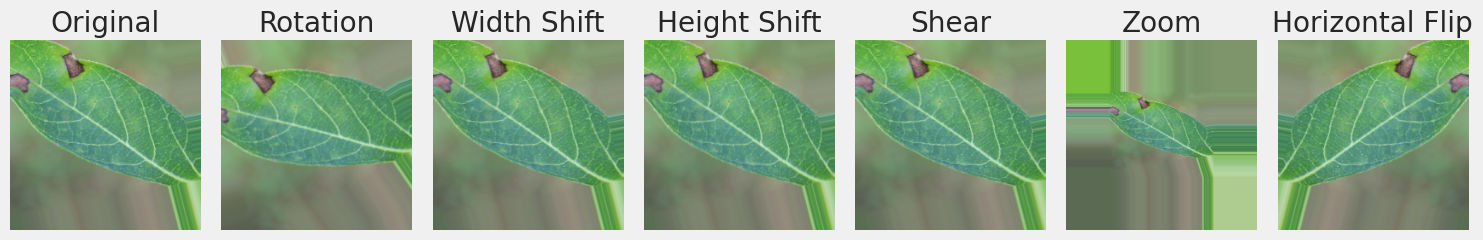

In [ ]:
g_dict = train_gen.class_indices
classes = list(g_dict.keys())
images, labels = next(train_gen)

image = images[0]
class_name = classes[np.argmax(labels[0])]
print(f"Class: {class_name}")

# Jenis augmentasi dan parameternya
aug_types = [
    ("Rotation", {'theta': train_datagen.rotation_range}),
    ("Width Shift", {'tx': train_datagen.width_shift_range}),
    ("Height Shift", {'ty': train_datagen.height_shift_range}),
    ("Shear", {'shear': train_datagen.shear_range}),
    ("Zoom", {'zx': train_datagen.zoom_range[0] + 1, 'zy': train_datagen.zoom_range[1] + 1}),
    ("Horizontal Flip", {'flip_horizontal': True})
]

aug_imgs = [train_datagen.apply_transform(image, params) for _, params in aug_types]
aug_names = [name for name, _ in aug_types]

# Visualisasi
def visualize_augmentations(original, aug_imgs, aug_names):
    fig, axes = plt.subplots(1, len(aug_imgs) + 1, figsize=(15, 5))
    axes[0].imshow(original)
    axes[0].set_title("Original")
    axes[0].axis('off')
    for i, (img, name) in enumerate(zip(aug_imgs, aug_names)):
        axes[i + 1].imshow(img)
        axes[i + 1].set_title(name)
        axes[i + 1].axis('off')
    plt.tight_layout()
    plt.show()

visualize_augmentations(image, aug_imgs, aug_names)


In [ ]:
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

class_counts = len(list(train_gen.class_indices.keys()))

In [ ]:
for image_batch, labels_batch in train_gen:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32, 5)


# Data Preprocessing

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D

# Load base model VGG16 dengan pre-trained weights dari ImageNet
base_model = VGG16(
  include_top=False,
  weights='imagenet',
  input_shape=(224, 224, 3),
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,788,933 (56.42 MB)

 Trainable params: 13,053,445 (49.79 MB)

 Non-trainable params: 1,735,488 (6.62 MB)

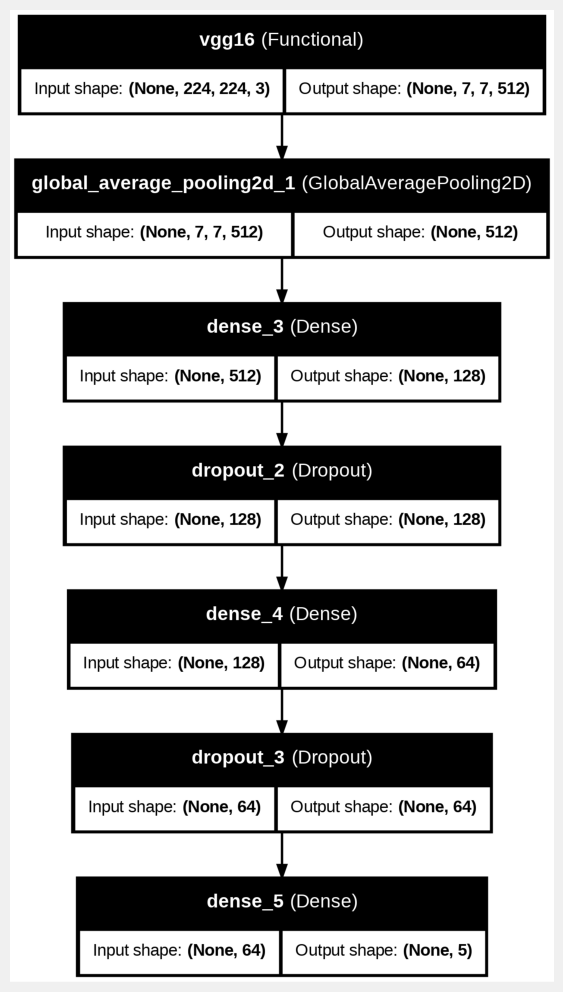

In [ ]:
base_model.trainable = False

for layer in base_model.layers[-8:]:
    layer.trainable = True


model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')
])

model.summary()

# Simpan arsitektur sebagai gambar
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_vgg16.png', show_shapes=True, show_layer_names=True)

# Tampilkan gambar
import matplotlib.image as mpimg
img = mpimg.imread('model_vgg16.png')
plt.figure(figsize=(12, 12))
plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
model.compile(optimizer=Adamax(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
epochs = 50

VGG16_history = model.fit(
    train_gen,
    epochs=epochs,
    verbose=1,
    validation_data=valid_gen,
    shuffle=False
)


Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 195s 832ms/step - accuracy: 0.2098 - loss: 1.6543 - val_accuracy: 0.3675 - val_loss: 1.5407
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 110s 586ms/step - accuracy: 0.2775 - loss: 1.5494 - val_accuracy: 0.5659 - val_loss: 1.1523
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 109s 580ms/step - accuracy: 0.4497 - loss: 1.2638 - val_accuracy: 0.7111 - val_loss: 0.7772
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 109s 581ms/step - accuracy: 0.6108 - loss: 0.9726 - val_accuracy: 0.7683 - val_loss: 0.5734
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 109s 580ms/step - accuracy: 0.7009 - loss: 0.7800 - val_accuracy: 0.8229 - val_loss: 0.4354
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 142s 582ms/step - accuracy: 0.7660 - loss: 0.6289 - val_accuracy: 0.8655 - val_loss: 0.3638
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 109s 580ms/step - accuracy: 0.8000 - loss: 0.5494 - val_accuracy: 0.8748 - val_loss: 0.3258
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 109s 579ms/step - accuracy: 0.8170 -

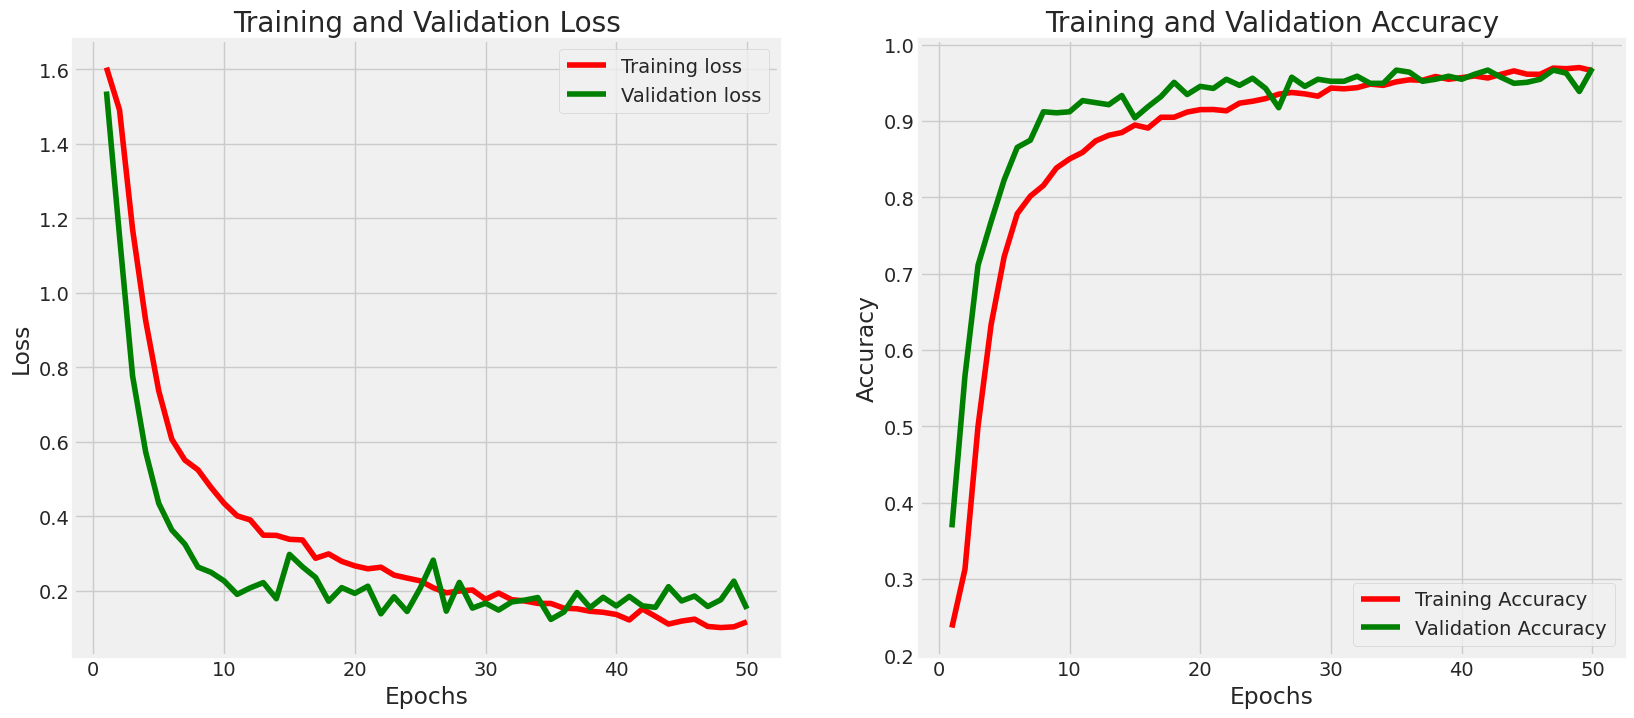

In [ ]:
model_performance(VGG16_history, epochs)

In [ ]:
model_evaluation(model)


188/188 ━━━━━━━━━━━━━━━━━━━━ 91s 482ms/step - accuracy: 0.9834 - loss: 0.0553
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - accuracy: 0.9767 - loss: 0.1328
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - accuracy: 0.9588 - loss: 0.1984
Train Loss:  0.056801702827215195
Train Accuracy:  0.982017993927002
--------------------
Validation Loss:  0.15211713314056396
Validation Accuracy:  0.9693741798400879
--------------------
Test Loss:  0.1962156593799591
Test Accuracy:  0.9587216973304749


# Evaluasi

24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 203ms/step


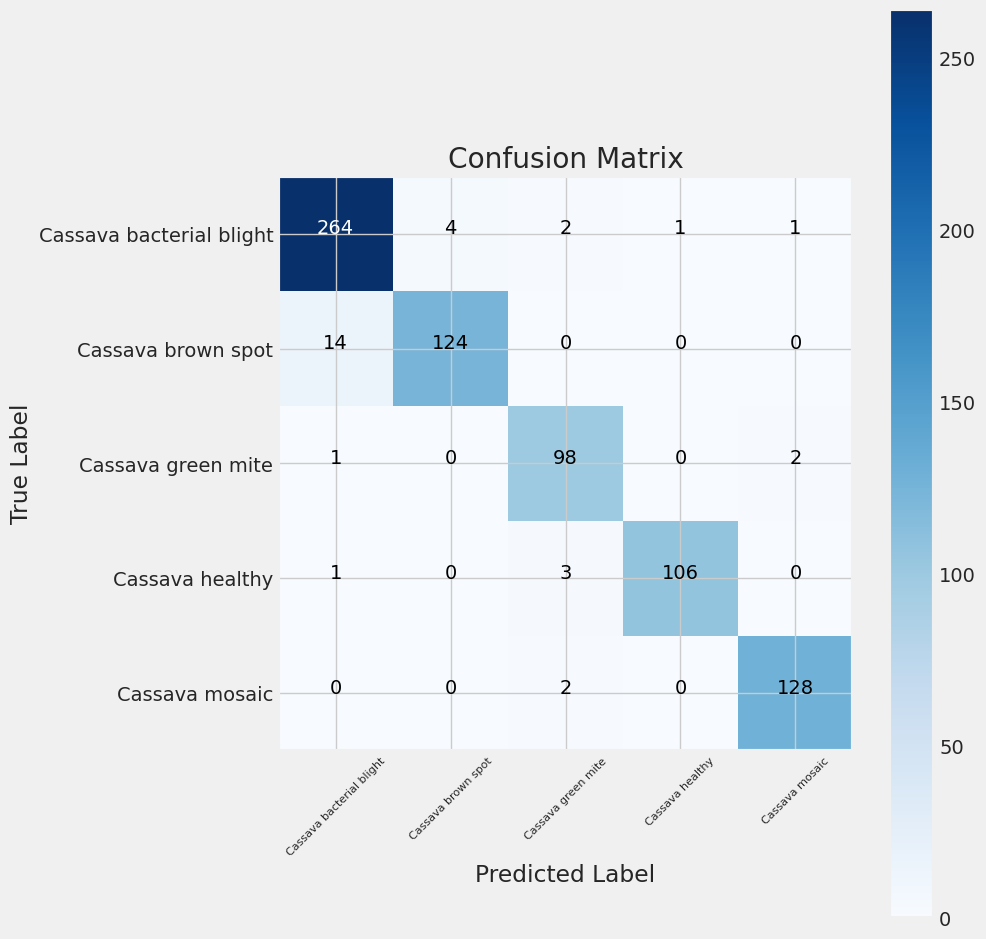

In [ ]:
y_pred = get_pred(model, test_gen)

plot_confusion_matrix(test_gen, y_pred)

In [ ]:
from sklearn.metrics import classification_report

# Ambil class names dari generator
class_names = list(test_gen.class_indices.keys())

# Ambil label asli dan prediksi
y_test = test_df.labels
y_pred_classes = [class_names[i] for i in y_pred]  # y_pred = hasil model.predict() yang sudah diargmax

# Tampilkan classification report
print("=== Classification Report ===")
print(classification_report(y_test, y_pred_classes))


=== Classification Report ===
                          precision    recall  f1-score   support

Cassava bacterial blight       0.94      0.97      0.96       272
      Cassava brown spot       0.97      0.90      0.93       138
      Cassava green mite       0.93      0.97      0.95       101
         Cassava healthy       0.99      0.96      0.98       110
          Cassava mosaic       0.98      0.98      0.98       130

                accuracy                           0.96       751
               macro avg       0.96      0.96      0.96       751
            weighted avg       0.96      0.96      0.96       751



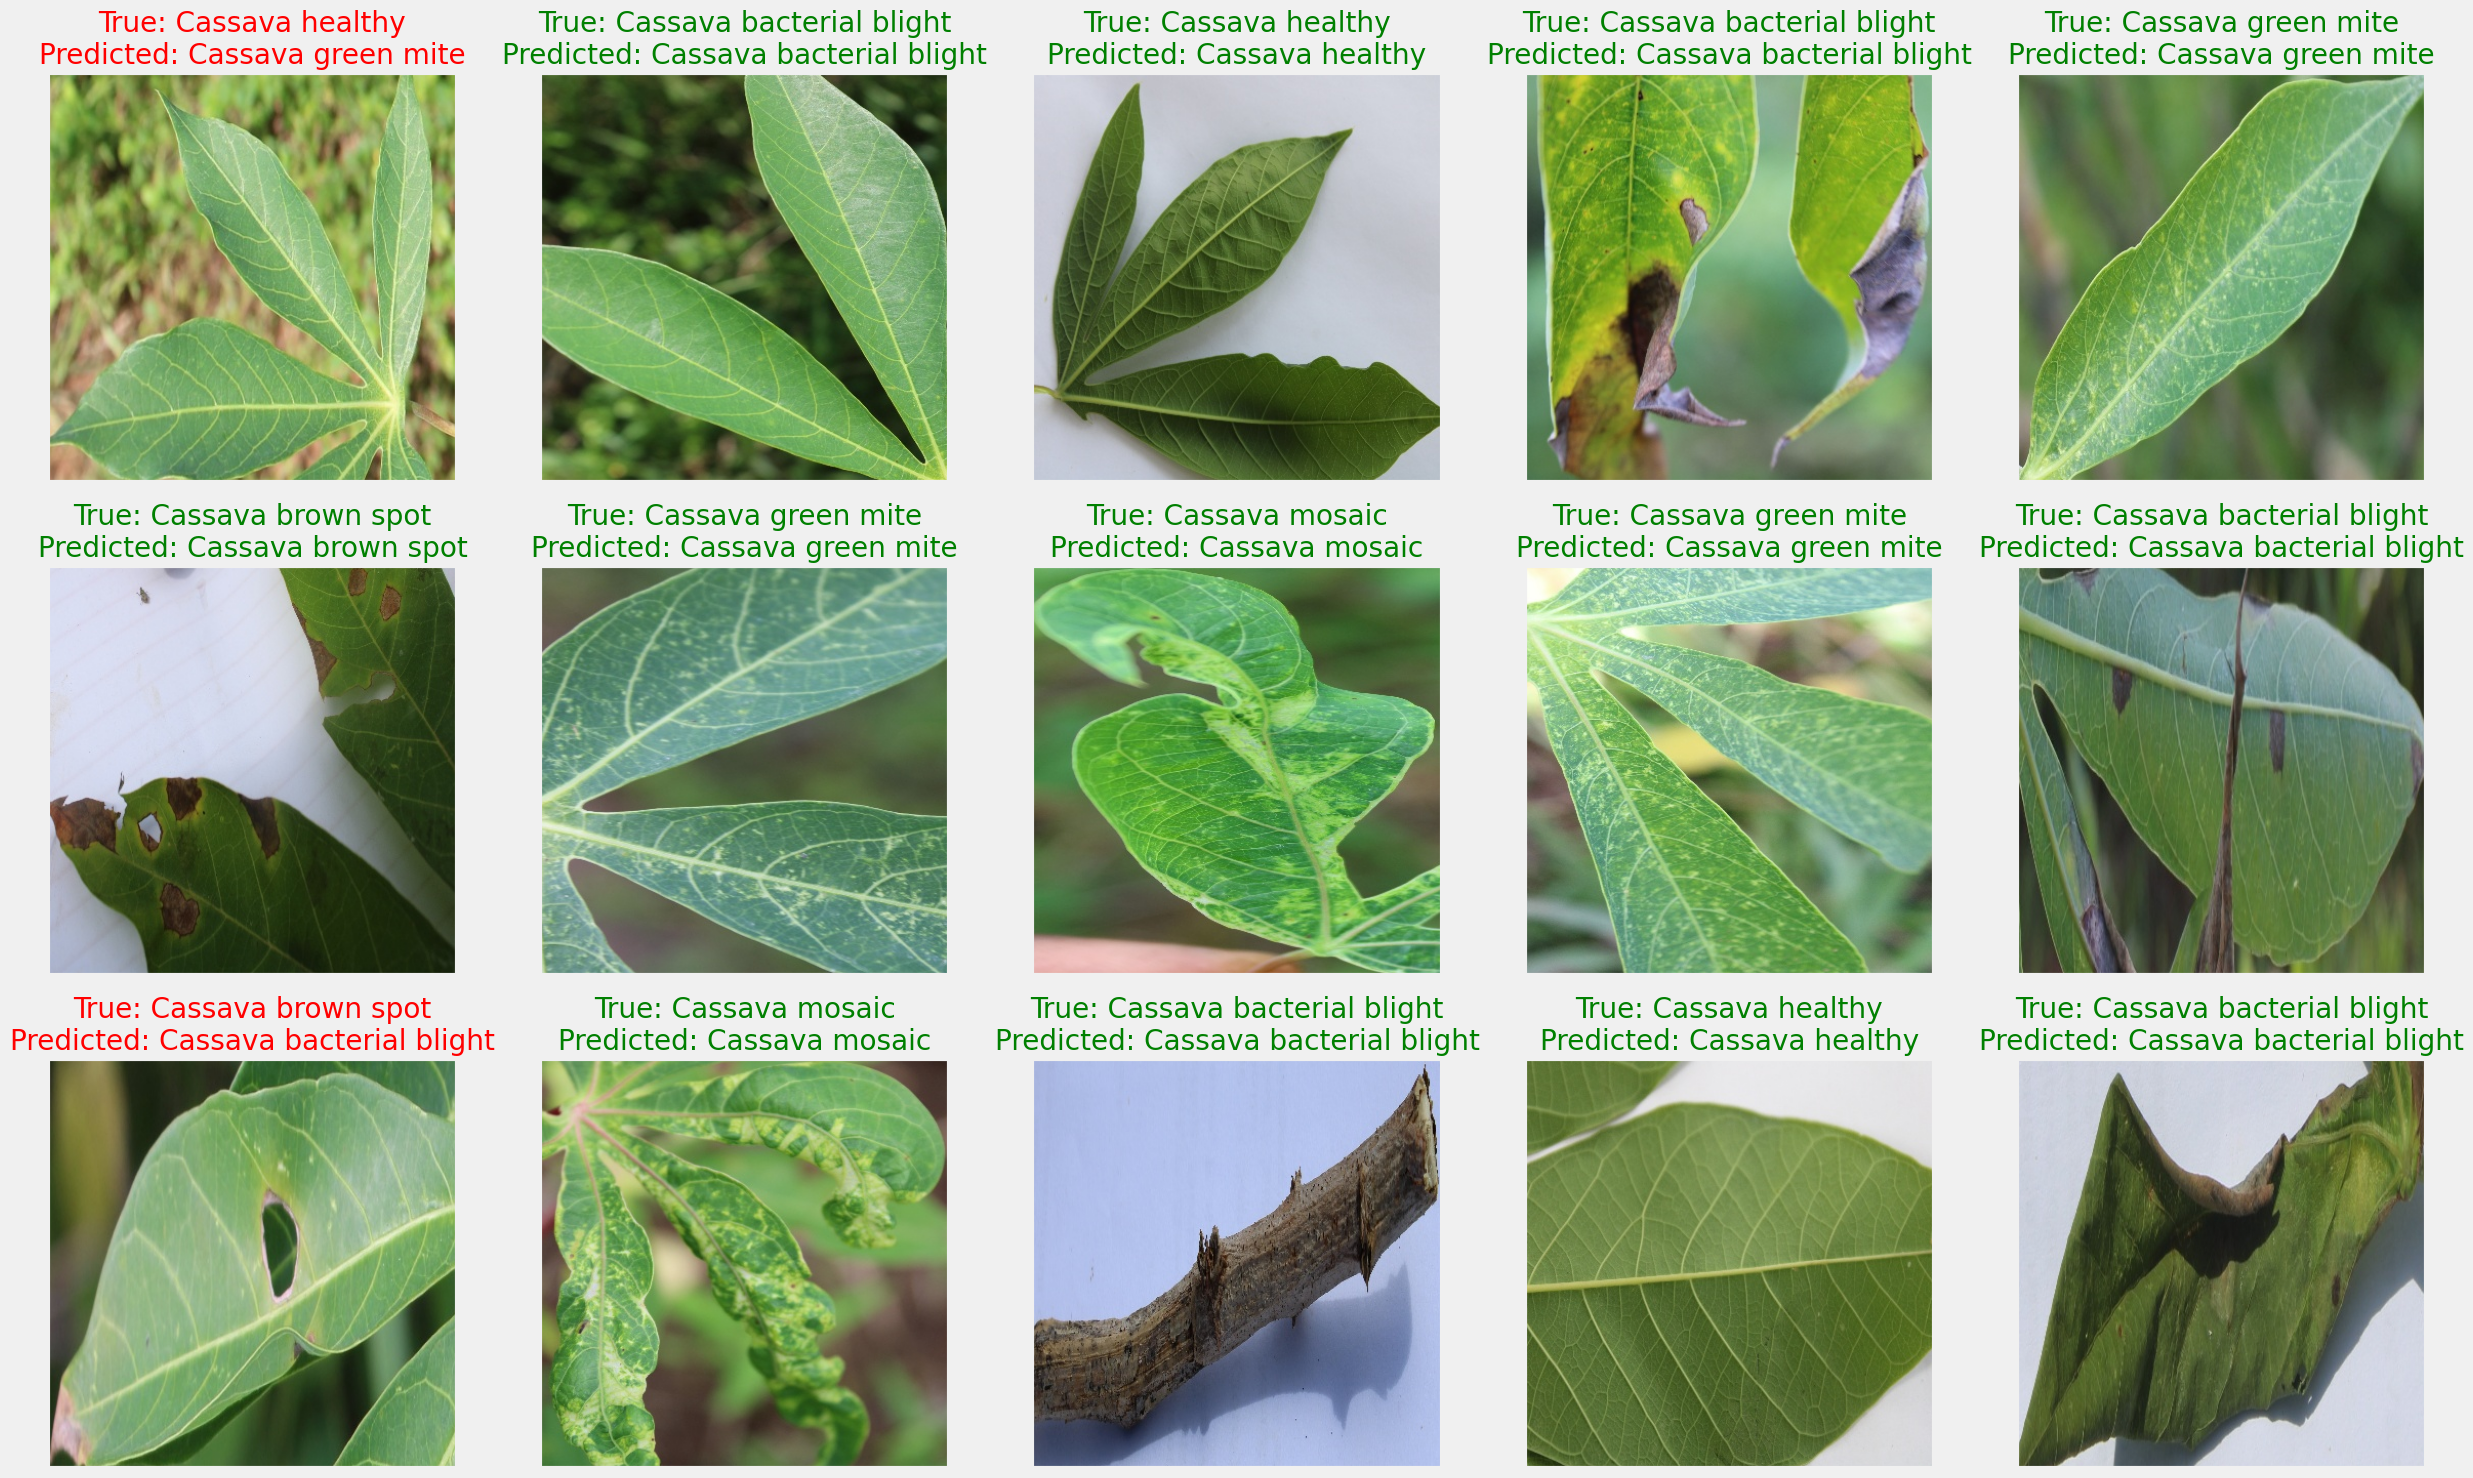

In [ ]:
from PIL import Image

# Ambil class names (pastikan sama dengan sebelumnya)
class_names = list(test_gen.class_indices.keys())

# Tampilkan 15 gambar acak dengan prediksi model
random_index = np.random.randint(0, len(test_df), 15)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    image_path = test_df.filepaths.iloc[random_index[i]]
    true_label = test_df.labels.iloc[random_index[i]]
    predicted_label = class_names[y_pred[random_index[i]]]

    image = Image.open(image_path)
    ax.imshow(image)

    color = 'green' if true_label == predicted_label else 'red'
    ax.set_title(f"True: {true_label}\nPredicted: {predicted_label}", color=color)

plt.tight_layout()
plt.show()


# Import TFLite

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('Daun_Singkong.tflite', 'wb') as f:
    f.write(tflite_model)
print("Model berhasil disimpan dalam format TFLite.")

Saved artifact at '/tmp/tmp2yoyh5bx'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_19')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  135216881892432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135216881893200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135216881881296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135216881881488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135216881892240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135216881888976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135216881889744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135216881891280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135216881886672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135216881887824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13521688188

Saving bacterial blight943_.jpg to bacterial blight943_.jpg


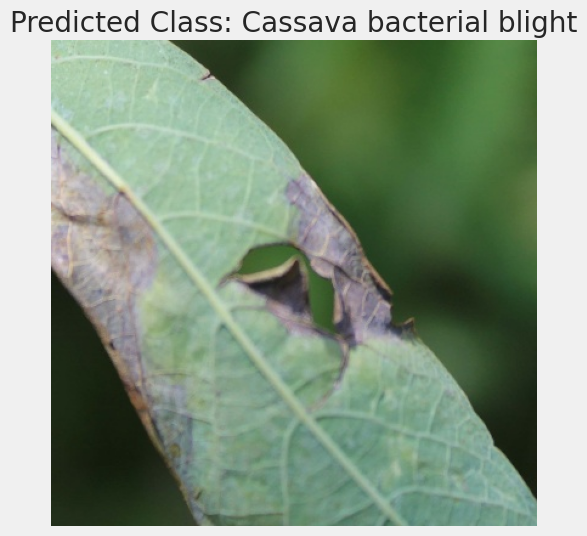

In [ ]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import files  # Untuk mengunggah file (gunakan di Google Colab)

# Load model TFLite
interpreter = tf.lite.Interpreter(model_path='/content/Daun_Singkong.tflite')
interpreter.allocate_tensors()

# Daftar kelas daun singkong
class_names = ['Cassava bacterial blight','Cassava brown spot','Cassava green mite', 'Cassava healthy','Cassava mosaic']

# ================================
# 🔹 Fungsi untuk Proses Gambar
# ================================
def preprocess_image(image_path):
    """Membaca dan memproses gambar agar sesuai dengan model"""
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")

    image = cv2.imread(image_path)
    if image is None:
        raise IOError(f"Failed to load image: {image_path}")

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224)) / 255.0  # Normalisasi
    return np.expand_dims(image.astype(np.float32), axis=0)

# ================================
# 🔹 Fungsi untuk Prediksi
# ================================
def make_prediction(image_path):
    """Melakukan prediksi menggunakan model TFLite"""
    input_data = preprocess_image(image_path)
    interpreter.set_tensor(interpreter.get_input_details()[0]['index'], input_data)
    interpreter.invoke()
    output_data = interpreter.get_tensor(interpreter.get_output_details()[0]['index'])
    predicted_class = class_names[np.argmax(output_data)]

    # Load gambar asli
    image = cv2.imread(image_path)
    return predicted_class, cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# ================================
# 🔹 Unggah dan Prediksi Gambar Baru
# ================================
uploaded = files.upload()  # Buka file explorer untuk memilih gambar

for file_name in uploaded.keys():
    predicted_class, image_rgb = make_prediction(file_name)

    # Tampilkan gambar dan hasil prediksi
    plt.figure(figsize=(6, 6))
    plt.imshow(image_rgb)
    plt.title(f"Predicted Class: {predicted_class}")
    plt.axis('off')
    plt.show()
